In [19]:
import os
import seaborn as sb
df = sb.load_dataset('taxis')
os.environ['THEME'] = 'dark'

🔵 *** df: dataframe ***
🟣 shape: (6_433, 14) columns: ['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls', 'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough'] 
🟣 duplicates: 0
🟣 missings: {'pickup': 0, 'dropoff': 0, 'passengers': 0, 'distance': 0, 'fare': 0, 'tip': 0, 'tolls': 0, 'total': 0, 'color': 0, 'payment': 44, 'pickup_zone': 26, 'dropoff_zone': 45, 'pickup_borough': 26, 'dropoff_borough': 45}
--- column uniques (all)
🟠 index [0, 1, 2, 3, 4,]
🟠 pickup(6_414|datetime64[ns]) [2019-02-28 23:29:03, 2019-03-01 00:03:29, 2019-03-01 00:08:32, 2019-03-01 00:15:53, ]
🟠 dropoff(6_425|datetime64[ns]) [2019-02-28 23:32:35, 2019-03-01 00:13:32, 2019-03-01 00:29:47, 2019-03-01 00:32:48, ]
🟠 passengers(7|int64) [0, 1, 2, 3, 4,]
🟠 distance(1_079|float64) [0.0, 0.01, 0.02, 0.03, 0.04,]
🟠 fare(220|float64) [1.0, 2.5, 3.0, 3.5, 4.0,]
🟠 tip(489|float64) [0.0, 0.01, 0.02, 0.06, 0.08,]
🟠 tolls(16|float64) [0.0, 2.64, 4.75, 5.54, 5.75,]
🟠

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


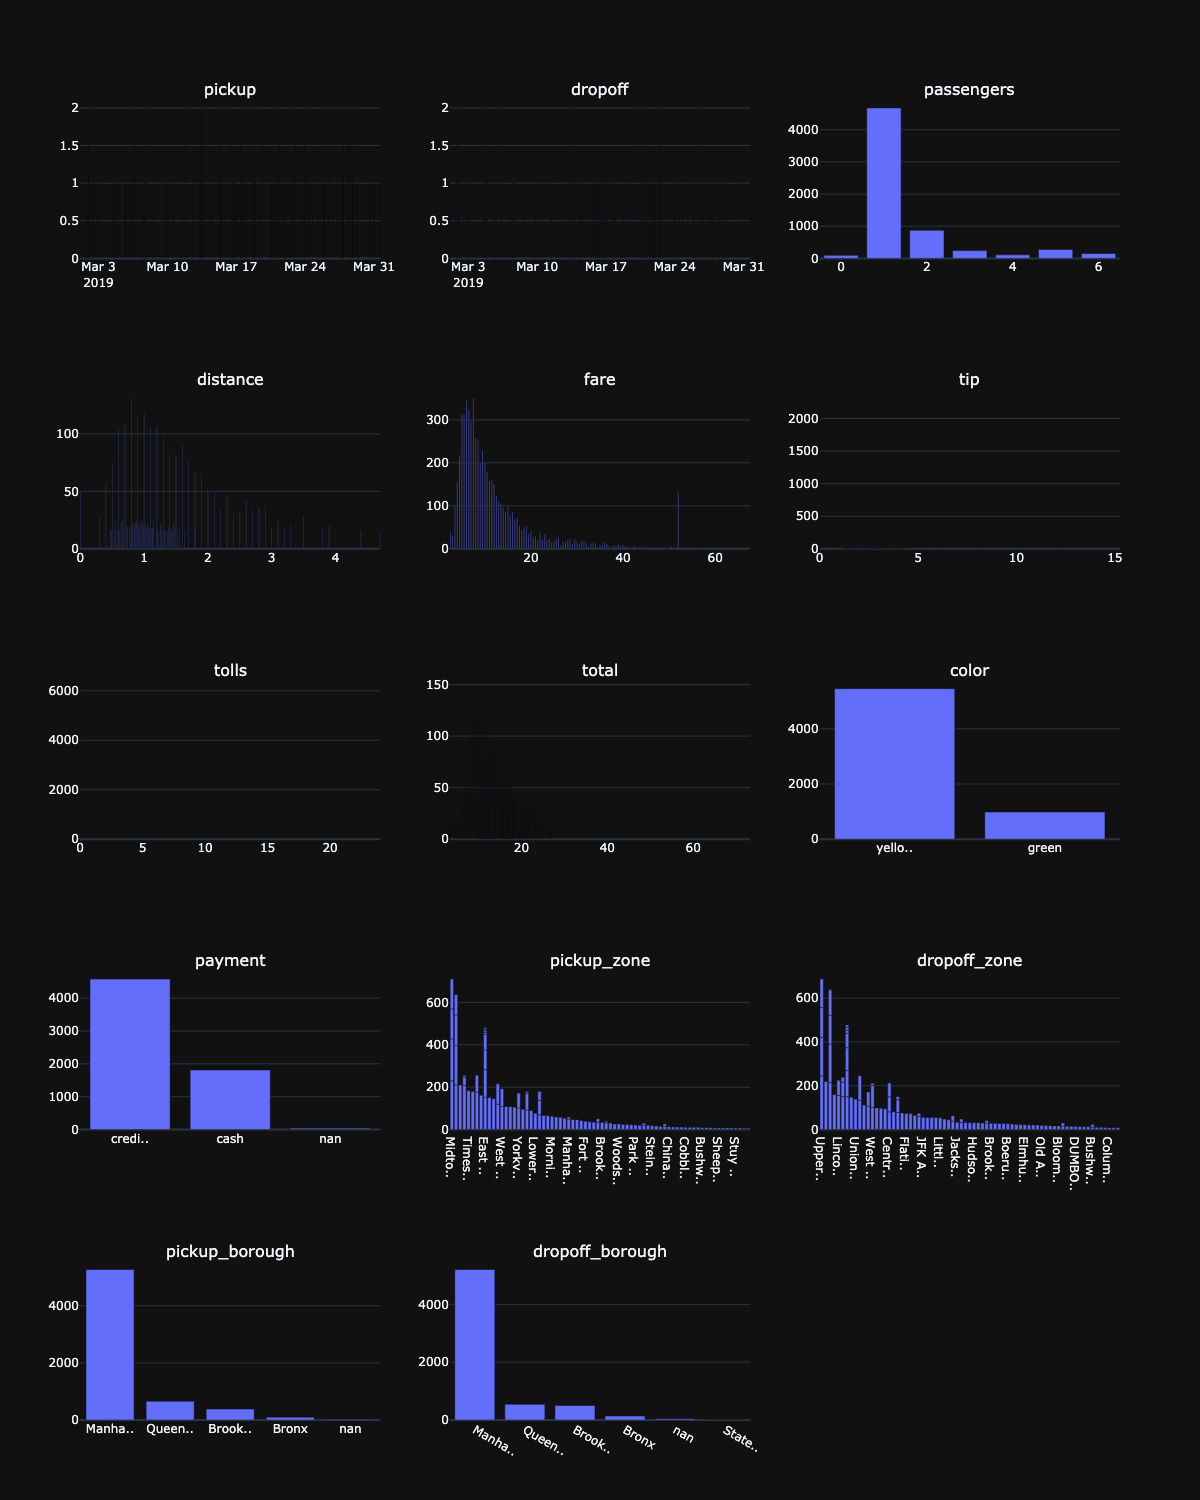

In [20]:
from pandas_plots import tbl, txt
tbl.describe_df(df, 'dataframe', top_n_uniques=5, top_n_chars_in_index=5)
# lol=txt.wrap(list(df['passengers'].sort_values().value_counts().index), max_items_in_line=40)
# lol=wrap('kldjfldjfljö', max_items_in_line=40)
# lol=list(df['passengers'].value_counts().sort_index().index)[:3]
# lol
# txt.wrap(lol)

In [21]:
import pandas as pd

_df = df[["passengers", "distance", "fare", "tip", "tolls", "color"]][:5]
tbl.show_num_df(
    _df.iloc[:, :-1],
    show_totals=True,
    data_bar_axis="x",
    pct_axis="xy",
    precision=0,
)
# _df.info()
# pd.api.types.is_numeric_dtype(_df)

,passengers,distance,fare,tip,tolls,Total
0,1 (1.1%),2 (1.8%),7 (8.0%),2 (2.4%),0,12 (13.4%)
1,1 (1.1%),1 (0.9%),5 (5.7%),0,0,7 (7.7%)
2,1 (1.1%),1 (1.6%),8 (8.5%),2 (2.7%),0,12 (13.9%)
3,1 (1.1%),8 (8.8%),27 (30.7%),6 (7.0%),0,42 (47.6%)
4,3 (3.4%),2 (2.5%),9 (10.2%),1 (1.3%),0,15 (17.4%)
Total,7 (8.0%),14 (15.5%),56 (63.2%),12 (13.4%),0,88 (100.0%)


In [22]:
_df=df[["color", "payment", "total"]]
# _df = df[["passengers", "distance"]][:5]
tbl.pivot_df(
    _df,
    show_totals=True,
    data_bar_axis="xy",
    pct_axis="xy",
    precision=0,
)

payment,,cash,credit card,Total
color,,,,
green,26 (0.0%),4_558 (3.8%),11_603 (9.7%),16_187 (13.6%)
yellow,639 (0.5%),22_036 (18.5%),80_263 (67.4%),102_938 (86.4%)
Total,664 (0.6%),26_594 (22.3%),91_866 (77.1%),119_125 (100.0%)


abc --> cars1 | cars2 | cars3 --> len: 11
ab --> cars1 | cars2 --> len: 7
ac --> cars1 | cars3 --> len: 8
bc --> cars2 | cars3 --> len: 9


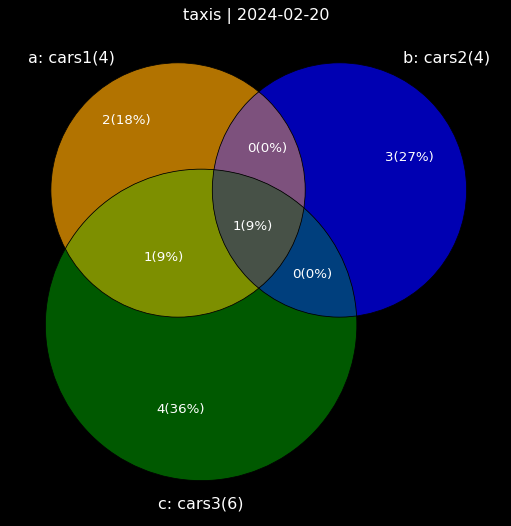

In [23]:
from pandas_plots import ven

set_a = {'ford','ferrari','mercedes', 'bmw'}
set_b = {'opel','bmw','bentley','audi'}
set_c = {'ferrari','bmw','chrysler','renault','peugeot','fiat'}
_df, _details = ven.show_venn3(
    title="taxis",
    a_set=set_a,
    a_label="cars1",
    b_set=set_b,
    b_label="cars2",
    c_set=set_c,
    c_label="cars3",
    verbose=0,
    size=8,
)

In [24]:
# plotly
import plotly_express as px

_fig=px.bar(_df, x=_df.index, y=_df.columns, title="taxis", text_auto=True, orientation="v")
_fig.update_layout(barnorm="percent")

_fig.show()
_df

,all,cars1,cars2
0,opel,NaN,opel
1,bentley,NaN,bentley
2,audi,NaN,audi
3,bmw,bmw,bmw
4,mercedes,mercedes,NaN
5,ford,ford,NaN
6,ferrari,ferrari,NaN


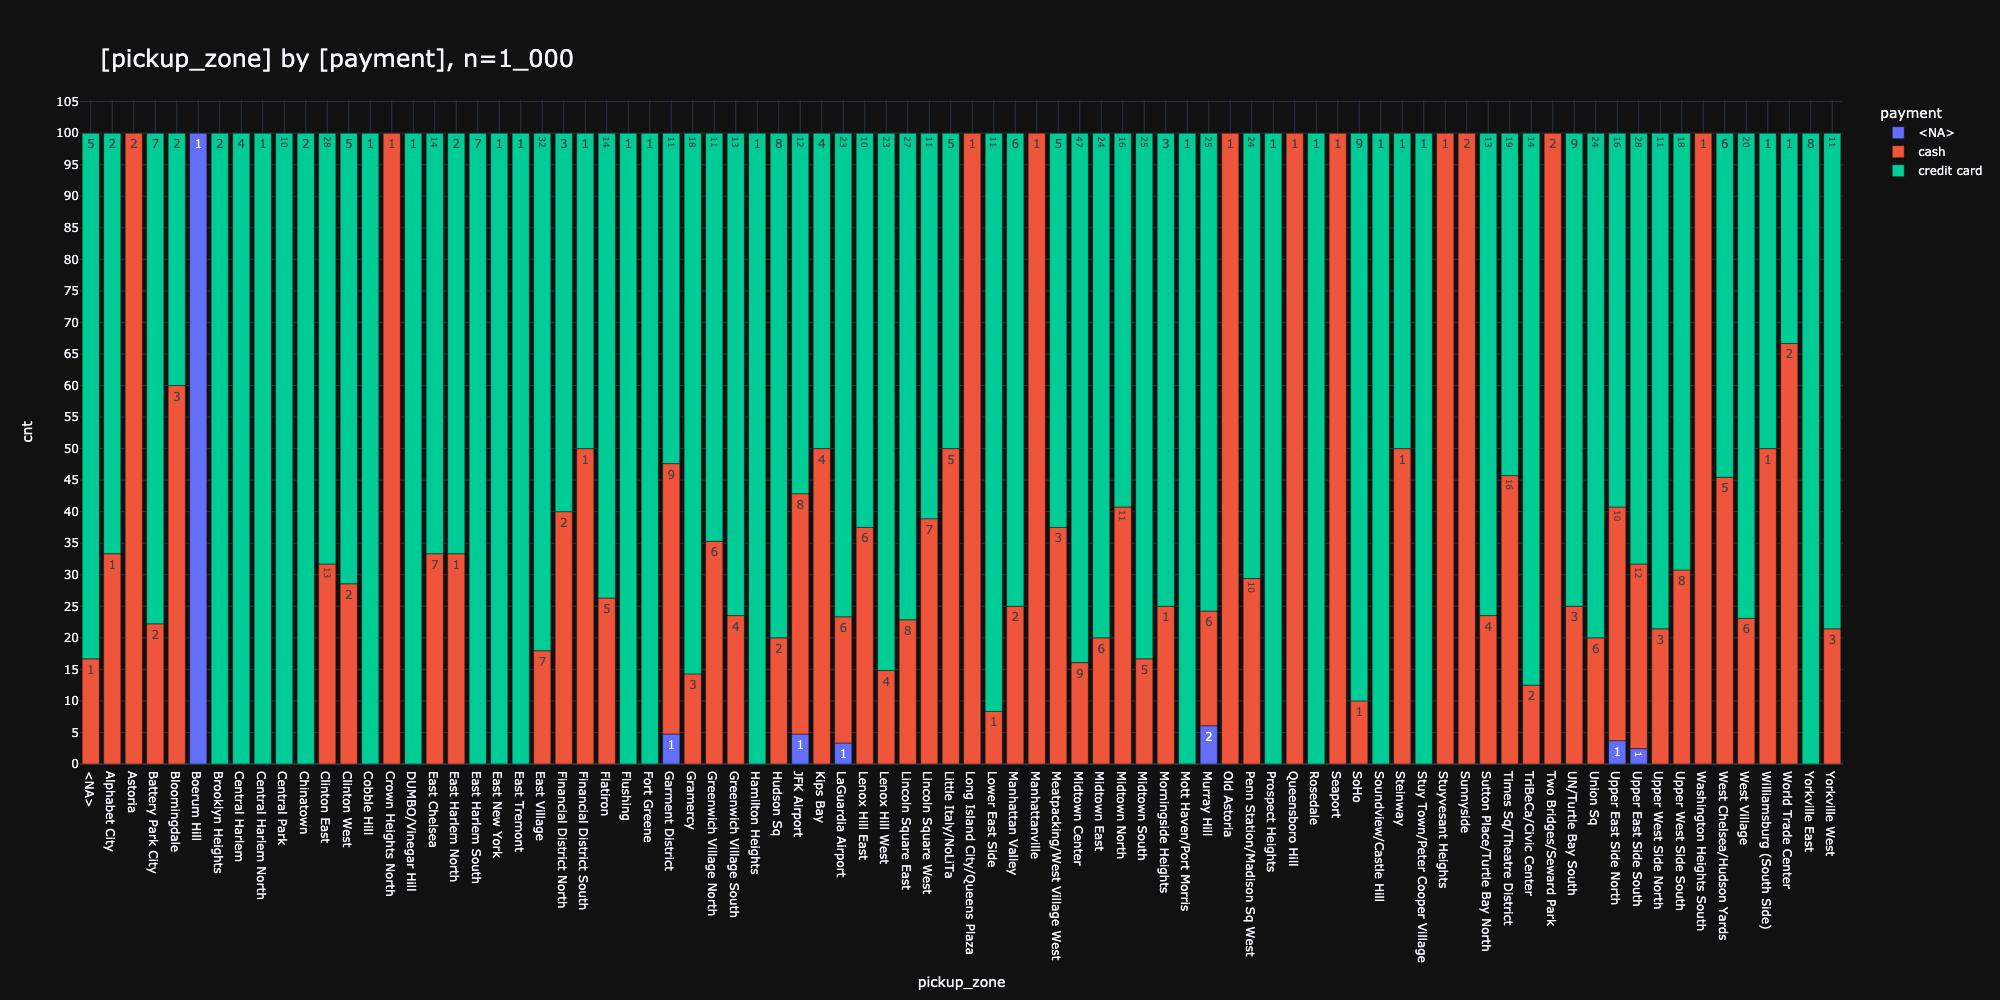

In [25]:
from pandas_plots import pls

_df = df[["payment", "pickup_zone"]][:1000]
pls.plot_stacked_bars(
    _df,
    swap=True,
    orientation="v",
    normalize=False,
    relative=True,
    height=1000,
)